Text(value='Jakarta, Bandung, Surabaya', description='Kota:', placeholder='Pisahkan dengan koma')

Button(description='Cari Cuaca', style=ButtonStyle())

,Kota,Suhu (°C),Cuaca,Kelembaban (%),Kecepatan Angin (m/s)
0,Sago,12.06,Moderate rain,98,1.41
1,Salido,24.30,Overcast clouds,92,1.76
2,Painan,25.43,Overcast clouds,88,1.72


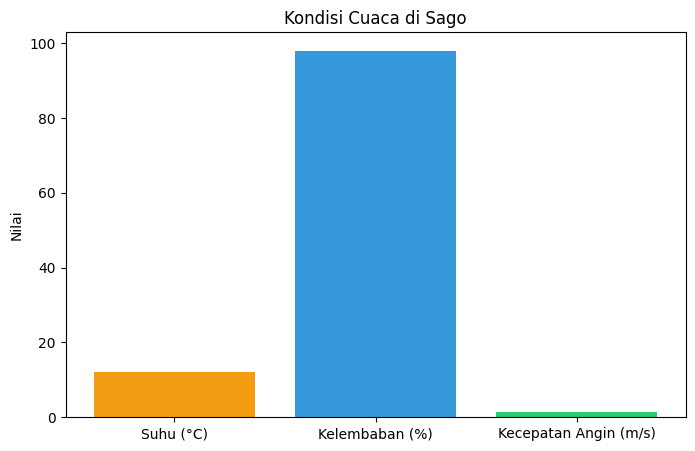

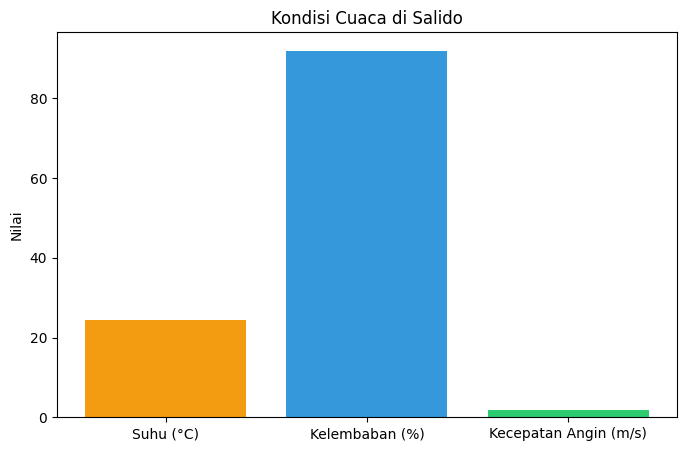

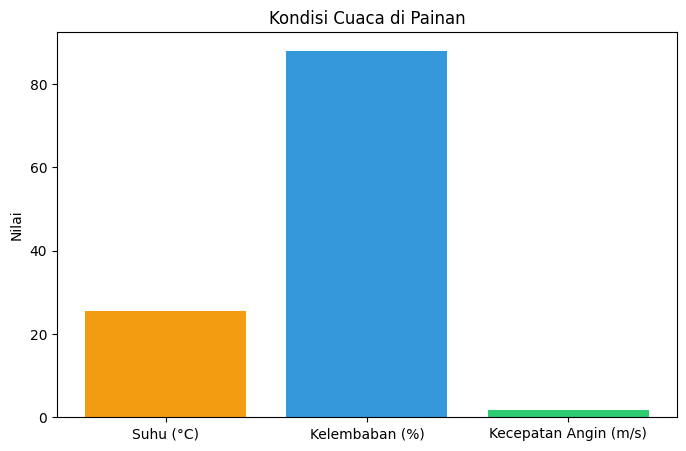

In [2]:
# Import library
import requests
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# API Key
api_key = 'f6a79db0fba22353d1625b676200f157'

# Fungsi untuk mengambil data cuaca dari API
def get_weather(city_name, api_key):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city_name,
        'appid': api_key,
        'units': 'metric'
    }
    response = requests.get(base_url, params=params)
    data = response.json()

    if response.status_code == 200:
        weather_info = {
            'Kota': data['name'],
            'Suhu (°C)': data['main']['temp'],
            'Cuaca': data['weather'][0]['description'].capitalize(),
            'Kelembaban (%)': data['main']['humidity'],
            'Kecepatan Angin (m/s)': data['wind']['speed']
        }
        return weather_info
    else:
        return None

# Fungsi untuk menampilkan data cuaca dalam bentuk tabel
def display_weather(data):
    df = pd.DataFrame(data.items(), columns=['Parameter', 'Nilai'])
    display(df)

# Fungsi untuk menampilkan grafik bar kondisi cuaca
def plot_weather(data):
    labels = ['Suhu (°C)', 'Kelembaban (%)', 'Kecepatan Angin (m/s)']
    values = [data['Suhu (°C)'], data['Kelembaban (%)'], data['Kecepatan Angin (m/s)']]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['#f39c12', '#3498db', '#2ecc71'])
    plt.title(f"Kondisi Cuaca di {data['Kota']}")
    plt.ylabel('Nilai')
    plt.show()

# Fungsi untuk mengambil data cuaca beberapa kota sekaligus
def multiple_city_weather(cities, api_key):
    all_data = []
    for city in cities:
        data = get_weather(city, api_key)
        if data:
            all_data.append(data)
        else:
            print(f"Data untuk {city} tidak ditemukan.")
    df = pd.DataFrame(all_data)
    return df

# Fungsi untuk menyimpan data ke file CSV
def save_to_csv(df, filename='data_cuaca.csv'):
    df.to_csv(filename, index=False)
    print(f"Data berhasil disimpan ke {filename}")

# Fungsi untuk input nama kota lewat widget interaktif
def input_cities():
    city_text = widgets.Text(
        value='Jakarta, Bandung, Surabaya',
        description='Kota:',
        placeholder='Pisahkan dengan koma'
    )
    display(city_text)

    button = widgets.Button(description="Cari Cuaca")
    display(button)

    # Ketika tombol diklik
    def on_button_clicked(b):
        city_list = [city.strip() for city in city_text.value.split(',')]
        df = multiple_city_weather(city_list, api_key)
        display(df)
        save_to_csv(df)
        for i in range(len(df)):
            data = df.iloc[i].to_dict()
            plot_weather(data)

    button.on_click(on_button_clicked)

# Jalankan widget input kota
input_cities()
